In [1]:
%matplotlib inline

# Einführung in NLP mit NLTK

Natural Language Processing (NLP) wird oft auf akademischer Ebene aus der Sicht von Computerlinguisten gelehrt. Als Data Scientist haben wir jedoch einen umfassenderen Blick auf die Welt der natürlichen Sprache – unstrukturierte Daten, die von Natur aus **latente Informationen** enthalten, die für den Menschen wichtig sind. NLP-Praktiker haben von maschinellen Lerntechniken profitiert, um die Bedeutung großer Korpora zu erschließen, und in diesem Notebook werden wir untersuchen, wie dies insbesondere mit Python und mit dem Natural Language Toolkit (NLTK) möglich ist.

NLTK ist eine ausgezeichnete Bibliothek für **maschinelles Lernen** basierend auf NLP, welche in Python geschrieben wurde. Python ermöglicht eine schnelle Erstellung von Anwendungen und Analysen.

## Schneller Überblick über NLTK
NLTK steht für **Natural Language Toolkit** und wurde von zwei herausragenden Computerlinguisten geschrieben, Steven Bird (Senior Research Associate des LDC und Professor an der University of Melbourne) und Ewan Klein (Professor of Linguistics an der Edinburgh University).
Die Sammlung von Bibliotheken umfasst:

- Tokenisierung, Stemming und Tagging
- Chunking und Parsen
- Sprachmodellierung
- Klassifizierung und Clustering
- logische Semantik

NLTK ist eine nützliche pädagogische Ressource zum Erlernen von NLP mit Python und dient als Ausgangspunkt für die Erstellung von produktionstauglichem Code, der eine natürliche Sprachanalyse erfordert. Es ist auch wichtig zu verstehen, was NLTK ist _nicht_:

- Out-of-the-Box Toolkit
- Allgemein anwendbar
- Magie

NLTK bietet eine Vielzahl von Tools, die zum Erkunden der linguistischen Domäne verwendet werden können, ist jedoch keine einfache Abhängigkeit, die leicht in andere Workflows integriert werden kann, insbesondere in solche, die Unit- und Integrationstests oder andere Buildprozesse erfordern. Dies liegt daran, dass NLTK viel zusätzlichen Code enthält, aber auch eine reichhaltige und vollständige Bibliothek von Korpora, die die integrierten Algorithmen antreibt.

###Die guten Teile von NLTK

- Vorverarbeitung
    - Segmentierung
    - Tokenisierung
    - PoS-Tagging
- Verarbeitung auf Wortebene
    - WordNet
    - Lemmatisierung
    - Stemmen
    - NGrams
- Dienstprogramme
    - Tree
    - FreqDist
    - ConditionalFreqDist
    - CorpusReader streamen
- Klassifizierung
    - Maximale Entropie
    - Naive Bayes
    - Entscheidungsbaum
- Chunking
- Anerkennung von benannten Entitäten
- Parser in Hülle und Fülle!

###Die schlechten Teile von NLTK

- Syntaktisches Parsen

    - Keine enthaltene Grammatik (keine Blackbox)
    - Kein Feature-/Abhängigkeits-Parsing
    - Keine enthaltene Funktionsgrammatik

- Das Sem-Paket
    
    - Nur Spielzeug (Lambda-Kalkül & Logik erster Ordnung)

- Viele Extras (Schwergewichtsabhängigkeit)

    - Papiere, Chatprogramme, Alignments, etc.

## Installation von NLTK

Dieses Notebook hat einige Abhängigkeiten, von denen die meisten über den Python-Paketmanager - `pip` - installiert werden können.

1. Python 2.7 oder höher (Anaconda ist in Ordnung)
2. NLTK
3. Die NLTK-Korpora
4. Die BeautifulSoup-Bibliothek
5. Die Gensim-Bibliothek

Sobald Sie Python und pip installiert haben, können Sie NLTK wie folgt installieren:

    ~$ pip install nltk
    
    ~$ pip install matplotlib
    
    ~$ pip install beautifulsoup4
    
    ~$ pip installiere gensim

Beachten Sie, dass diese auch Numpy und Scipy installieren, wenn sie nicht bereits installiert sind.

Um die Korpora herunterzuladen, öffnen Sie einen Python-Interperter:

In [2]:
import nltk

In [28]:
nltk.download('gutenberg')
nltk.download('inaugural')
nltk.download('shakespeare')
nltk.download('stopwords')
nltk.download('brown')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package shakespeare to /root/nltk_data...
[nltk_data]   Package shakespeare is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

## Arbeiten mit Beispielkorpora

NLTK wird mit einer Vielzahl von Korpora ausgeliefert. Zugriff auf den Text von _Moby Dick_ erhalten bekommen wir folgendermaßen:

In [6]:
moby = nltk.text.Text(nltk.corpus.gutenberg.words('melville-moby_dick.txt'))

Die `nltk.text.Text`-Klasse ist ein Wrapper um eine Folge einfacher (String-)Tokens - gedacht nur für _die anfängliche Untersuchung von Text_ normalerweise über die Python-REPL. Es hat die folgenden Methoden:

- common_contexts
- concordance
- collocations
- count
- plot
- findall
- index

Die `concordance`-funktion führt eine Suche nach dem angegebenen Token durch und liefert dann auch den umgebenden Kontext:

In [7]:
moby.concordance("ship")

Displaying 25 of 518 matches:
hale is floating at the stern of the ship , they cut off his head , and tow it
ution for fear they should run their ship upon them ." -- SCHOUTEN ' S SIXTH C
 from the Elbe , wind N . E . in the ship called The Jonas - in - the - Whale 
RATIVE OF THE SHIPWRECK OF THE WHALE SHIP ESSEX OF NANTUCKET , WHICH WAS ATTAC
HALING CRUIZE . 1846 . " The Whale - ship Globe , on board of which vessel occ
OCK . ANOTHER VERSION OF THE WHALE - SHIP GLOBE NARRATIVE . " The voyages of t
" It is impossible to meet a whale - ship on the ocean without being struck by
e whales , that the whites saw their ship in bloody possession of the savages 
E TAKING AND RETAKING OF THE WHALE - SHIP HOBOMACK . " It is generally well kn
on his sword ; I quietly take to the ship . There is nothing surprising in thi
 , when first told that you and your ship were now out of sight of land ? Why 
 , a cook being a sort of officer on ship - board -- yet , somehow , I never f
eat hurricane ; the ha

Bei gegebenem Kontext, der ein Wort umgibt, können wir ähnliche Wörter entdecken, z.B. Wörter, die häufig im gleichen Kontext und mit ähnlicher Verteilung vorkommen: Verteilungsähnlichkeit:

In [8]:
moby.similar("monstrous")
austen = nltk.text.Text(nltk.corpus.gutenberg.words('austen-sense.txt'))
print
austen.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless
very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


Die Erstellung des Index im Speicher braucht etwas Zeit, einer der Gründe, warum diese Klasse nicht im Produktionscode verwendet werden sollte. Jetzt, da wir Suchen und Ähnlichkeiten durchführen können, finden Sie die gemeinsamen Kontexte einer Reihe von Wörtern:

In [9]:
moby.common_contexts(["sea", "whale"])

the_when a_of the_is the_as the_in the_can the_this the_but the_and
the_for the_the the_which the_he of_ivory the_could the_had the_with
the_by the_from the_at


NLTK verwendet matplotlib und pylab, um Grafiken und Diagramme anzuzeigen, die Dispersionen und Verteilungen anzeigen können. Dies ist besonders interessant für den Korpus der Ansprachen von US-Präsidenten.

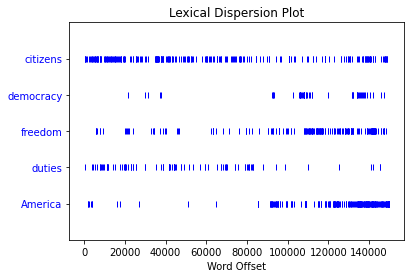

In [14]:
inaugural = nltk.text.Text(nltk.corpus.inaugural.words())
inaugural.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

Um einen Liste der eingebauten Korpus zu erkunden, können wir folgendene Methoden verwenden:

In [16]:
# Lists the various corpora and CorpusReader classes in the nltk.corpus module
for name in dir(nltk.corpus):
    if name.islower() and not name.startswith('_'): print (name)

abc
alpino
brown
cess_cat
cess_esp
cmudict
comparative_sentences
comtrans
conll2000
conll2002
conll2007
crubadan
demo
dependency_treebank
find_corpus_fileids
floresta
framenet
framenet15
gazetteers
genesis
gutenberg
ieer
inaugural
indian
jeita
knbc
lin_thesaurus
mac_morpho
machado
masc_tagged
movie_reviews
multext_east
names
nombank
nombank_ptb
nonbreaking_prefixes
nps_chat
opinion_lexicon
perluniprops
ppattach
product_reviews_1
product_reviews_2
propbank
propbank_ptb
pros_cons
ptb
qc
re
reader
reuters
rte
semcor
senseval
sentence_polarity
sentiwordnet
shakespeare
sinica_treebank
state_union
stopwords
subjectivity
swadesh
swadesh110
swadesh207
switchboard
tagged_treebank_para_block_reader
teardown_module
timit
timit_tagged
toolbox
treebank
treebank_chunk
treebank_raw
twitter_samples
udhr
udhr2
universal_treebanks
util
verbnet
webtext
wordnet
wordnet_ic
words


In [19]:
# For a specific corpus, list the fileids that are available:
print (nltk.corpus.shakespeare.fileids())

['a_and_c.xml', 'dream.xml', 'hamlet.xml', 'j_caesar.xml', 'macbeth.xml', 'merchant.xml', 'othello.xml', 'r_and_j.xml']


In [21]:
print (nltk.corpus.gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [25]:
print (nltk.corpus.stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


Diese Korpora exportieren mehrere wichtige Methoden:

- paras (durch jeden Absatz iterieren)
- sents (durch jeden Satz iterieren)
- words (durch jedes Wort iterieren)
- raw (Zugriff auf den Rohtext erhalten)

In [29]:
corpus = nltk.corpus.brown
print (corpus.paras())

[[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.']], [['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.']], ...]


In [30]:
print (corpus.sents())

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]


In [31]:
print (corpus.words())

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]


In [32]:
print (corpus.raw()[:200]) # Be careful!



	The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd ``/`` no/at evidence/nn ''/'' tha


## Frequency Analyses

In statistical machine learning approaches to NLP, the very first thing we need to do is count things - especially the unigrams that appear in the text and their relationships to each other. NLTK provides two very excellent classes to enable these frequency analyses:

- `FreqDist`
- `ConditionalFreqDist` 

And these two classes serve as the foundation for most of the probability and statistical analyses that we will conduct.

First we will compute the following:

- The count of words
- The vocabulary (unique words)
- The lexical diversity (the ratio of word count to vocabulary)

## Frequenzanalysen

Bei statistischen maschinellen Lernansätzen für NLP müssen wir als erstes Dinge zählen – insbesondere die im Text vorkommenden Unigramme und ihre Beziehungen zueinander. NLTK bietet zwei sehr hervorragende Klassen, um diese Frequenzanalysen zu ermöglichen:

- `FreqDist`
- `BedingterFreqDist`

Und diese beiden Klassen dienen als Grundlage für die meisten Wahrscheinlichkeits- und statistischen Analysen, die wir durchführen werden.

Zuerst berechnen wir folgendes:

- Die Anzahl der Wörter
- Das Vokabular (eindeutige Wörter)
- Die lexikalische Vielfalt (das Verhältnis von Wortzahl zu Wortschatz)

In [46]:
nltk.download('reuters')
!unzip /root/nltk_data/corpora/reuters.zip -d /root/nltk_data/corpora

[nltk_data] Downloading package reuters to /root/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
Archive:  /root/nltk_data/corpora/reuters.zip
replace /root/nltk_data/corpora/reuters/cats.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [47]:
reuters = nltk.corpus.reuters # Corpus of news articles
#reuters
counts  = nltk.FreqDist(reuters.words())
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)

print ("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 41600 types and 1720901 tokens for a lexical diversity of 41.368


In [48]:
counts.B()

41600

In [50]:
counts.most_common(40)  # The n most common tokens in the corpus

[('.', 94687),
 (',', 72360),
 ('the', 58251),
 ('of', 35979),
 ('to', 34035),
 ('in', 26478),
 ('said', 25224),
 ('and', 25043),
 ('a', 23492),
 ('mln', 18037),
 ('vs', 14120),
 ('-', 13705),
 ('for', 12785),
 ('dlrs', 11730),
 ("'", 11272),
 ('The', 10968),
 ('000', 10277),
 ('1', 9977),
 ('s', 9298),
 ('pct', 9093),
 ('it', 8842),
 (';', 8762),
 ('&', 8698),
 ('lt', 8694),
 ('on', 8556),
 ('from', 7986),
 ('cts', 7953),
 ('is', 7580),
 ('>', 7449),
 ('that', 7377),
 ('its', 7265),
 ('by', 6872),
 ('"', 6816),
 ('at', 6537),
 ('2', 6528),
 ('U', 6388),
 ('S', 6382),
 ('year', 6310),
 ('be', 6288),
 ('with', 5945)]

In [51]:
counts.max() # tThe most frequent token in the corpus

'.'

In [52]:
counts.hapaxes()[0:10]  # A list of all hapax legomena 

['RIFT',
 'Mounting',
 'inflict',
 'Move',
 'Unofficial',
 'Sheen',
 'Safe',
 'avowed',
 'VERMIN',
 'EAT']

In [53]:
counts.freq('with') * 100 # percentage of the corpus for this token

0.3454585708300477

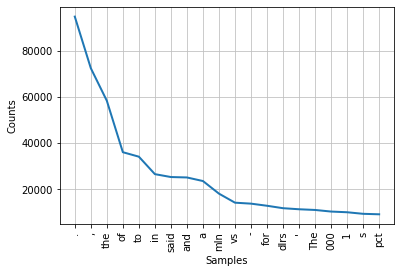

In [54]:
counts.plot(20, cumulative=False)

## Preprocessing Text

NLTK is great at the preprocessing of Raw text - it provides the following tools for dividing text into it's constituent parts:

- `sent_tokenize`: a Punkt sentence tokenizer:

    This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.  It must be trained on a large collection of plaintext in the target language before it can be used.
    
    However, Punkt is designed to learn parameters (a list of abbreviations, etc.) unsupervised from a corpus similar to the target domain. The pre-packaged models may therefore be unsuitable: use PunktSentenceTokenizer(text) to learn parameters from the given text.
    
    
- `word_tokenize`: a Treebank tokenizer 

    The Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank. This is the method that is invoked by ``word_tokenize()``.  It assumes that the text has already been segmented into sentences, e.g. using ``sent_tokenize()``.
    

- `pos_tag`: a maximum entropy tagger trained on the Penn Treebank

    There are several other taggers including (notably) the BrillTagger as well as the BrillTrainer to train your own tagger or tagset. 

## Textvorverarbeitung

NLTK eignet sich hervorragend zur Vorverarbeitung von Rohtext - es bietet die folgenden Werkzeuge zum Aufteilen von Text in seine Bestandteile:

- `sent_tokenize`: ein Punkt-Satz-Tokenizer:

    Dieser Tokenizer unterteilt einen Text in eine Liste von Sätzen, indem er einen nicht überwachten Algorithmus verwendet, um ein Modell für Abkürzungswörter, Kollokationen und Wörter zu erstellen, die Sätze beginnen. Es muss mit einer großen Sammlung von Klartext in der Zielsprache trainiert werden, bevor es verwendet werden kann.
    
    Punkt ist jedoch dafür ausgelegt, Parameter (eine Liste von Abkürzungen usw.) unbeaufsichtigt von einem Korpus ähnlich der Zieldomäne zu lernen. Die vorgefertigten Modelle können daher ungeeignet sein: Verwenden Sie PunktSentenceTokenizer(text), um Parameter aus dem gegebenen Text zu lernen.
    
    
- `word_tokenize`: ein Treebank-Tokenizer

    Der Treebank-Tokenizer verwendet reguläre Ausdrücke zum Tokenisieren von Text wie in Penn Treebank. Dies ist die Methode, die von ``word_tokenize()`` aufgerufen wird. Es wird davon ausgegangen, dass der Text bereits in Sätze segmentiert wurde, z.B. mit ``sent_tokenize()``.
    

- `pos_tag`: ein Tagger mit maximaler Entropie, der auf der Penn Treebank trainiert wurde

    Es gibt mehrere andere Tagger, darunter (insbesondere) den BrillTagger sowie den BrillTrainer zum Trainieren Ihres eigenen Taggers oder Tagsets.

In [57]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [58]:
text = u"Medical personnel returning to New York and New Jersey from the Ebola-riddled countries in West Africa will be automatically quarantined if they had direct contact with an infected person, officials announced Friday. New York Gov. Andrew Cuomo (D) and New Jersey Gov. Chris Christie (R) announced the decision at a joint news conference Friday at 7 World Trade Center. “We have to do more,” Cuomo said. “It’s too serious of a situation to leave it to the honor system of compliance.” They said that public-health officials at John F. Kennedy and Newark Liberty international airports, where enhanced screening for Ebola is taking place, would make the determination on who would be quarantined. Anyone who had direct contact with an Ebola patient in Liberia, Sierra Leone or Guinea will be quarantined. In addition, anyone who traveled there but had no such contact would be actively monitored and possibly quarantined, authorities said. This news came a day after a doctor who had treated Ebola patients in Guinea was diagnosed in Manhattan, becoming the fourth person diagnosed with the virus in the United States and the first outside of Dallas. And the decision came not long after a health-care worker who had treated Ebola patients arrived at Newark, one of five airports where people traveling from West Africa to the United States are encountering the stricter screening rules."

for sent in nltk.sent_tokenize(text): 
    print (sent)
    print


Medical personnel returning to New York and New Jersey from the Ebola-riddled countries in West Africa will be automatically quarantined if they had direct contact with an infected person, officials announced Friday.
New York Gov.
Andrew Cuomo (D) and New Jersey Gov.
Chris Christie (R) announced the decision at a joint news conference Friday at 7 World Trade Center.
“We have to do more,” Cuomo said.
“It’s too serious of a situation to leave it to the honor system of compliance.” They said that public-health officials at John F. Kennedy and Newark Liberty international airports, where enhanced screening for Ebola is taking place, would make the determination on who would be quarantined.
Anyone who had direct contact with an Ebola patient in Liberia, Sierra Leone or Guinea will be quarantined.
In addition, anyone who traveled there but had no such contact would be actively monitored and possibly quarantined, authorities said.
This news came a day after a doctor who had treated Ebola pati

In [60]:
for sent in nltk.sent_tokenize(text):
    print (list(nltk.word_tokenize(sent)))
    print

['Medical', 'personnel', 'returning', 'to', 'New', 'York', 'and', 'New', 'Jersey', 'from', 'the', 'Ebola-riddled', 'countries', 'in', 'West', 'Africa', 'will', 'be', 'automatically', 'quarantined', 'if', 'they', 'had', 'direct', 'contact', 'with', 'an', 'infected', 'person', ',', 'officials', 'announced', 'Friday', '.']
['New', 'York', 'Gov', '.']
['Andrew', 'Cuomo', '(', 'D', ')', 'and', 'New', 'Jersey', 'Gov', '.']
['Chris', 'Christie', '(', 'R', ')', 'announced', 'the', 'decision', 'at', 'a', 'joint', 'news', 'conference', 'Friday', 'at', '7', 'World', 'Trade', 'Center', '.']
['“', 'We', 'have', 'to', 'do', 'more', ',', '”', 'Cuomo', 'said', '.']
['“', 'It', '’', 's', 'too', 'serious', 'of', 'a', 'situation', 'to', 'leave', 'it', 'to', 'the', 'honor', 'system', 'of', 'compliance.', '”', 'They', 'said', 'that', 'public-health', 'officials', 'at', 'John', 'F.', 'Kennedy', 'and', 'Newark', 'Liberty', 'international', 'airports', ',', 'where', 'enhanced', 'screening', 'for', 'Ebola', 'i

In [62]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [63]:
for sent in nltk.sent_tokenize(text):
    print (list(nltk.pos_tag(nltk.word_tokenize(sent))))
    print

[('Medical', 'JJ'), ('personnel', 'NNS'), ('returning', 'VBG'), ('to', 'TO'), ('New', 'NNP'), ('York', 'NNP'), ('and', 'CC'), ('New', 'NNP'), ('Jersey', 'NNP'), ('from', 'IN'), ('the', 'DT'), ('Ebola-riddled', 'JJ'), ('countries', 'NNS'), ('in', 'IN'), ('West', 'NNP'), ('Africa', 'NNP'), ('will', 'MD'), ('be', 'VB'), ('automatically', 'RB'), ('quarantined', 'VBN'), ('if', 'IN'), ('they', 'PRP'), ('had', 'VBD'), ('direct', 'JJ'), ('contact', 'NN'), ('with', 'IN'), ('an', 'DT'), ('infected', 'JJ'), ('person', 'NN'), (',', ','), ('officials', 'NNS'), ('announced', 'VBD'), ('Friday', 'NNP'), ('.', '.')]
[('New', 'NNP'), ('York', 'NNP'), ('Gov', 'NNP'), ('.', '.')]
[('Andrew', 'NNP'), ('Cuomo', 'NNP'), ('(', '('), ('D', 'NNP'), (')', ')'), ('and', 'CC'), ('New', 'NNP'), ('Jersey', 'NNP'), ('Gov', 'NNP'), ('.', '.')]
[('Chris', 'NNP'), ('Christie', 'NNP'), ('(', '('), ('R', 'NNP'), (')', ')'), ('announced', 'VBD'), ('the', 'DT'), ('decision', 'NN'), ('at', 'IN'), ('a', 'DT'), ('joint', 'JJ')

All of these taggers work _pretty_ well - but you can (and should train them on your own corpora). 

## Stemming and Lemmatization

We have an immense number of word forms as you can see from our various counts in the `FreqDist` above - it is helpful for many applications to normalize these word forms (especially applications like search) into some canonical word for further exploration. In English (and many other languages) - mophological context indicate gender, tense, quantity, etc. but these sublties might not be necessary:

Stemming = chop off affixes to get the root stem of the word:

    running --> run
    flowers --> flower
    geese   --> geese 
    
Lemmatization = look up word form in a lexicon to get canonical lemma

    women   --> woman
    foxes   --> fox
    sheep   --> sheep
    
There are several stemmers available:

    - Lancaster (English, newer and aggressive)
    - Porter (English, original stemmer)
    - Snowball (Many langauges, newest)
    
The Lemmatizer uses the WordNet lexicon
    

Alle diese Tagger funktionieren gut - aber wir können (und sollten sie auf unserem eigenen Korpora trainieren).

## Stemming und Lemmatisierung

Wir haben eine immense Anzahl von Wortformen, wie Sie an unseren verschiedenen Zählungen in der `FreqDist` oben sehen können - es ist für viele Anwendungen hilfreich, diese Wortformen (insbesondere Anwendungen wie die Suche) zur weiteren Untersuchung in ein kanonisches Wort zu normalisieren. Auf Englisch (und vielen anderen Sprachen) - mophologischer Kontext gibt Geschlecht, Zeitform, Quantität usw. an, aber diese Feinheiten sind möglicherweise nicht erforderlich:

Stemming = Affixe abhacken, um den Stammstamm des Wortes zu erhalten:

    laufen --> laufen
    Blumen --> Blume
    Gänse --> Gänse
    
Lemmatisierung = Wortform in einem Lexikon nachschlagen, um kanonisches Lemma zu erhalten

    Frauen --> Frau
    Füchse --> Fuchs
    Schafe --> Schafe
    
Es stehen mehrere Stemmmer zur Verfügung:

    - Lancaster (Englisch, neuer und aggressiv)
    - Porter (englisch, original Stemmer)
    - Schneeball (viele Sprachen, neueste)
    
Der Lemmatizer verwendet das WordNet-Lexikon

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

text = list(nltk.word_tokenize("The women running in the fog passed bunnies working as computer scientists."))

snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

for stemmer in (snowball, lancaster, porter):
    stemmed_text = [stemmer.stem(t) for t in text]
    print stemmed_text

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(t) for t in text]
print lemmas

Note that the lemmatizer has to load the WordNet corpus which takes a bit.

Typical normalization of text for use as features in machine learning models looks something like this:

Beachten Sie, dass der Lemmatizer das WordNet-Korpus laden muss, was etwas dauert.

Eine typische Normalisierung von Text zur Verwendung als Funktionen in Modellen für maschinelles Lernen sieht in etwa so aus:

In [ ]:
import string

## Module constants
lemmatizer  = WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def normalize(text):
    for token in nltk.word_tokenize(text):
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        if token not in stopwords and token not in punctuation:
            yield token

print list(normalize("The eagle ... flies at midnight."))

## Named Entity Recognition

NLTK has an excellent MaxEnt backed Named Entity Recognizer that is trained on the Penn Treebank. You can also retrain the chunker if you'd like - the code is very readable to extend it with a Gazette or otherwise. 

## Anerkennung von benannten Entitäten

NLTK verfügt über einen ausgezeichneten MaxEnt-gestützten Named Entity Recognizer, der auf der Penn Treebank trainiert wird. Sie können den Chunker auch neu trainieren, wenn Sie möchten - der Code ist sehr gut lesbar, um ihn mit einer Gazette oder auf andere Weise zu erweitern.

In [ ]:
print nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize("John Smith is from the United States of America and works at Microsoft Research Labs")))

You can also wrap the Stanford NER system, which many of you are also probably used to using.

Sie können auch das Stanford NER-System einwickeln, an das viele von Ihnen wahrscheinlich auch gewöhnt sind.

In [ ]:
import os
from nltk.tag.stanford import NERTagger

# change the paths below to point to wherever you unzipped the Stanford NER download file
stanford_root = '/Users/benjamin/Development/stanford-ner-2014-01-04'
stanford_data = os.path.join(stanford_root, 'classifiers/english.all.3class.distsim.crf.ser.gz')
stanford_jar  = os.path.join(stanford_root, 'stanford-ner-2014-01-04.jar')

st = NERTagger(stanford_data, stanford_jar, 'utf-8')
for i in st.tag("John Bengfort is from the United States of America and works at Microsoft Research Labs".split()):
    print '[' + i[1] + '] ' + i[0]


## Exercises

### Preprocessing

The primary responsibility you will have before any task involving NLP is to ingest and transform raw text into a corpus that can then be used for performing further evaluations. NLTK provides many corpora for you to work with for exploration, but you must become able to design and construct your own corpora, and to implement `nltk.CorpusReader` objects - classes that in a memory safe and efficient way are able to read entire corpora and analyze them. 

Many people get away with the `nltk.PlainTextCorpusReader` - which uses built-in taggers and tokenizers to deal with raw text. However, this methodology leaves you at the mercy of the tagging model that you have provided, and does not allow you to make corrections that are saved in between runs. Instead you should preprocess your text to allow it to be read by the `nltk.corpus.TaggedCorpusReader` or the penultimate corpus, the `nltk.corpus.BracketParseCorpusReader`. 

In this task, you will transform raw text into a format that can then be read by the `nltk.corpus.TaggedCorpusReader`. See the documentation at [http://www.nltk.org/api/nltk.corpus.reader.html](http://www.nltk.org/api/nltk.corpus.reader.html) for more information on this reader. 

You will find 20-40 documents of recent tech articles from Engadget and Tech Crunch at the following link: [http://bit.ly/nlpnltkcorpus](http://bit.ly/nlpnltkcorpus) - please download them to your local file system. Write a Python program that uses NLTK to preprocess these documents into a format that can be easily read by the `nltk.corpus.TaggedCorpusReader`. 

Note that you will have to process these files and remove HTML tags and you might have to do other tasks related to the clean up; to do this I suggest you use the third party library BeautifulSoup which can be found at [http://www.crummy.com/software/BeautifulSoup/](http://www.crummy.com/software/BeautifulSoup/). See also Chapter 3 in the NLTK book for more information.

#### Evaluation

1. What is the word count and vocabulary of this corpus?
2. What is the lexical diversity of the corpus?
3. What are the 5 most common lexical categories (parts of speech)?
4. What are the 10 most common unigrams, the 10 most common bigrams? (please exclude stopwords, using the `nltk.corpus.stopwords('english')` list)
5. How many nouns are in the corpus?

### Parsing

Given a seed inventory of pre-terminal and non-terminal symbols (grammatical categories) and a sample lexicon, write a grammar for English noun phrases. Your grammar should cover all legal structures of noun phrases used by the grammatical categories provided. You must include the following:

- noun-noun compounds ("brick wall", "lawn chair")
- relative clauses of the form Rel-Cl ⟶ Rel-Pro V NP ("[the ball] that hit her") 

**Note:** You do not need to cover more than one PP in a row, more than one adjective in a row, noun-noun compounds of length > 2, quantifiers followed by determiners ("all of these") or mass nouns ("beer", "sincerity")

You should then write a program that uses an NLTK parser and the grammar you constructed that will return a syntactic tree if the input is a noun phrase or None if the input is ungrammatical. Your program will have to take the input sentence, tokenize it and then tag it according to the lexicon (you can assume that words in this lexicon do not have multiple senses) - you'll then have to pass the grammar phrase (the tags) to the parser.

#### Tagset

    N = noun
    NP = noun phrase
    Adj = adjective
    AdjP = adjective phrase
    Adv = adverb
    Prep = preposition
    PP = prepositional phrase
    Quant = quantifier
    Ord = ordinal numeral
    Card = cardinal numeral	Rel-Cl = relative clause
    Rel-Pro = relative pronoun
    V = verb
    S = sentence
    Det = determiner
    Dem-Det = demonstrative determiner
    Wh-Det = wh-determiner
    PPron = personal pronoun
    PoPron = possessive pronoun

#### Sample Lexicon

    a            Det
    an           Det
    at           Prep
    airplane     NSg
    airplanes    NPl
    airport      NSg
    airports     NPl
    any          Quant
    beautiful    Adj
    big          Adj
    eat          V
    eats         V3Sg
    finished     VPastPP
    four         Card
    fourth       Ord
    he           PPron
    his          PoPron
    in           Prep
    many         Quant
    my           PoPron
    new          Adj
    of           Prep
    offered      VPastPP
    on           Prep
    restaurant   NSg
    restaurants  NPl
    runway       NSg
    runways      NPl
    second       Ord
    some         Quant
    that         Dem-DetSg
    that         Rel-Pro
    the          Det
    this         Dem-DetSg
    these        Dem-DetPl
    third        Ord
    those        Dem-DetPl
    three        Card
    two          Card
    very         Adv
    which        Wh-Det
    who          Wh-Det
    you          PPron

#### Evaluation Phrases

- "Four new airports"
- "Very new airport runways"
- "His second house"
- "Some beautiful dishes which a restaurant offered"
- "The runway that the airport built"

### Document Classification

In the first week you created an ingestion mechanism and an NLTK corpus reader for a set of RSS feeds. These feeds potentially have topics associated with them (broad tags like tech, news, sports, etc). In this question you'll build a classifier on a data set of RSS feeds that is provided in the course materials to decide whether or not you can categorize the various topics using one of the classifiers you learned in this week.

The corpus is constructed as follows. Each individual blog post is in its own HTML file stored in a directory labled with the topic. Use the `nltk.CategorizedCorpusReader` or the `nltk.CategorizedPlaintextCorpusReader` to construct your corpora (you may review how the movie reviews data set is structured). To do this you need to pass to the corpus the path to the root of your corpus, and a regular expression to match file names. You also need to use a regular expression passed as the `cat_pattern` keyword argument, which is used to match the category labels. Here is an example for the spam corpus:

    from nltk.corpus import CategorizedPlaintextCorpusReader as EmailCorpus

    corpus   = EmailCorpus("./data/nbspam", r'(?!\.).*\.[a-f0-9]+',
                   cat_pattern=r'(spam|ham)/.*', encoding='iso-8859-1')

    print corpus.categories()
    print corpus.fileids()

Create a test set, a dev test set, and a training set from randomly shuffled documents that are in the corpus to use in your development. Save these sets to disk with pickles to ensure that you can develop easily with them.

Create a function that extracts features per document. Choose any features you would like. One idea is to use the most common unigrams; you might be able to use common bigrams as well. If you can think of any other features, feel free to include them as well (maybe an includes_recipe feature, etc.)) You may want to consider a TF-IDF feature to improve your results.

Train the classifier of your choice on the training data, and then improve it with your dev set. Report your final accuracy and the most informative features by running the accuracy checker on the final test set.

#### Evaluation

1. Report accuracy and most informative features of classifier (4 points)
2. Show complete work with submitted Python code (6 points)
3. Create a corpus reader that extends a built-in NLTK corpus reader (4 points)
4. Create an efficient feature extractor (4 points)
5. Achieve an accuracy with your classifier of greater than 85% (2 points)

### Product Classification

The second question involves comparing and contrast the Naive Bayes Classifier with the Maximum Entropy classifier. You will be given an abbreviated data set of product names and their descriptions as well as their label (tops, bottoms, shoes, etc.) - similarly to question one, create a corpus that can read the CSV file - you may want to look at the `nltk.corpus.WordListCorpusReader` for inspiration about how to create such a corpus (each product is on a single line).

Create test and training sets from the data then build both a NaiveBayes and Maxent classifier - make sure that you save these classifiers to disk using the `pickle` module! The Maxent classifier in particular will take a long time to train. Once they're trained; report the accuracy of each as well as the most informative features. Are there any surprises? Which classifier performs better?


##Übungen

###Vorverarbeitung

Die Hauptaufgabe, die Sie vor jeder Aufgabe im Zusammenhang mit NLP haben, besteht darin, Rohtext aufzunehmen und in einen Korpus umzuwandeln, der dann für weitere Auswertungen verwendet werden kann. NLTK bietet Ihnen viele Korpora, mit denen Sie zur Erkundung arbeiten können, aber Sie müssen in der Lage sein, Ihre eigenen Korpora zu entwerfen und zu konstruieren und `nltk.CorpusReader`-Objekte zu implementieren - Klassen, die auf speichersichere und effiziente Weise in der Lage sind, ganze Korpora zu lesen und analysieren sie.

Viele Leute kommen mit dem `nltk.PlainTextCorpusReader` davon - der eingebaute Tagger und Tokenizer verwendet, um mit Rohtext umzugehen. Bei dieser Methode sind Sie jedoch dem von Ihnen bereitgestellten Tagging-Modell ausgeliefert und können keine Korrekturen vornehmen, die zwischen den Läufen gespeichert werden. Stattdessen sollten Sie Ihren Text vorverarbeiten, damit er vom `nltk.corpus.TaggedCorpusReader` oder dem vorletzten Korpus, dem `nltk.corpus.BracketParseCorpusReader` gelesen werden kann.

In dieser Aufgabe transformieren Sie Rohtext in ein Format, das dann vom `nltk.corpus.TaggedCorpusReader` gelesen werden kann. Weitere Informationen zu . finden Sie in der Dokumentation unter [http://www.nltk.org/api/nltk.corpus.reader.html](http://www.nltk.org/api/nltk.corpus.reader.html). dieser Leser.

Unter folgendem Link finden Sie 20-40 Dokumente mit aktuellen technischen Artikeln von Engadget und Tech Crunch: [http://bit.ly/nlpnltkcorpus](http://bit.ly/nlpnltkcorpus) Dateisystem. Schreiben Sie ein Python-Programm, das NLTK verwendet, um diese Dokumente in ein Format vorzuverarbeiten, das vom `nltk.corpus.TaggedCorpusReader` leicht gelesen werden kann.

Beachten Sie, dass Sie diese Dateien verarbeiten und HTML-Tags entfernen müssen und möglicherweise andere Aufgaben im Zusammenhang mit der Bereinigung ausführen müssen. Dazu empfehle ich Ihnen, die Bibliothek BeautifulSoup eines Drittanbieters zu verwenden, die Sie unter [http://www.crummy.com/software/BeautifulSoup/](http://www.crummy.com/software/BeautifulSoup/) finden. Siehe auch Kapitel 3 im NLTK-Buch für weitere Informationen.

#### Auswertung

1. Was ist die Wortzahl und das Vokabular dieses Korpus?
2. Wie groß ist die lexikalische Vielfalt des Korpus?
3. Was sind die 5 häufigsten lexikalischen Kategorien (Wortarten)?
4. Was sind die 10 häufigsten Unigramme, die 10 häufigsten Bigramme? (Bitte schließen Sie Stoppwörter aus, indem Sie die Liste `nltk.corpus.stopwords('english')` verwenden)
5. Wie viele Nomen sind im Korpus?

### Parsen

Schreiben Sie eine Grammatik für englische Nominalphrasen mit einem Startinventar von prä-terminalen und nicht-terminalen Symbolen (grammatischen Kategorien) und einem Beispiellexikon. Ihre Grammatik sollte alle rechtlichen Strukturen von Nominalphrasen abdecken, die von den bereitgestellten grammatikalischen Kategorien verwendet werden. Sie müssen Folgendes enthalten:

- Substantiv-Substantiv-Verbindungen ("Ziegelmauer", "Rasenstuhl")
- Relativsätze der Form Rel-Cl ⟶ Rel-Pro V NP ("[der Ball], der sie traf")

**Hinweis:** Sie müssen nicht mehr als ein PP hintereinander abdecken, mehr als ein Adjektiv hintereinander, Substantiv-Substantiv-Verbindungen mit einer Länge > 2, Quantoren gefolgt von Determinatoren ("all diese ") oder Massensubstantive ("Bier", "Aufrichtigkeit")

Sie sollten dann ein Programm schreiben, das einen NLTK-Parser und die von Ihnen erstellte Grammatik verwendet, die einen syntaktischen Baum zurückgibt, wenn die Eingabe eine Nominalphrase ist, oder None, wenn die Eingabe ungrammatisch ist. Ihr Programm muss den eingegebenen Satz nehmen, ihn tokenisieren und dann gemäß dem Lexikon taggen (Sie können davon ausgehen, dass Wörter in diesem Lexikon nicht mehrere Bedeutungen haben) - Sie müssen dann die Grammatikphrase (die Tags) übergeben. zum Parser.

#### Tagset

    N = Substantiv
    NP = Nominalphrase
    Adj = Adjektiv
    AdjP = Adjektivphrase
    Adv = Adverb
    Präp = Präposition
    PP = Präpositionalphrase
    Quant = Quantor
    Ord = Ordnungszahl
    Karte = Kardinalzahl Rel-Cl = Relativsatz
    Rel-Pro = Relativpronomen
    V = Verb
    S = Satz
    Det = Determinator
    Dem-Det = demonstrativer Determinator
    Wh-Det = Wh-Bestimmer
    PPron = Personalpronomen
    PoPron = Possessivpronomen

#### Beispiellexikon

    ein Det
    ein Det
    bei Prep
    Flugzeug NSg
    Flugzeuge
    Flughafen NSg
    Flughäfen NPL
    Beliebige Quantität
    schöne Adja
    große Adj
    iss V
    isst V3SgS
    fertiges VPastPP
    vier Karte
    vierte Ord
    er PPron
    seine PoPron
    in Vorbereitung
    viele Quanten
    mein PoPron
    neue Adj
    von Prep
    angebotenes VPastPP
    auf Vorbereitung
    Restaurant NSg
    Restaurants
    Start- und Landebahn NSg
    Start- und Landebahnen
    zweiter Ord
    einige Quanten
    dass Dem-DetSg
    dass Rel-Pro
    die Det
    dieses Dem-DetSg
    diese Dem-DetPl
    dritte Ord
    diese Dem-DetPl
    drei Karte
    zwei Karten
    sehr hilfreich
    welche Wh-Det
    wer Wh-Det
    du PPron

#### Bewertungssätze

- "Vier neue Flughäfen"
- "Sehr neue Start- und Landebahnen"
- "Sein zweites Haus"
- "Einige schöne Gerichte, die ein Restaurant anbot"
- "Die Landebahn, die der Flughafen gebaut hat"

### Dokumentenklassifizierung

In der ersten Woche haben Sie einen Aufnahmemechanismus und einen NLTK-Corpus-Reader für eine Reihe von RSS-Feeds erstellt. Mit diesen Feeds sind möglicherweise Themen verknüpft (breite Tags wie Technik, Nachrichten, Sport usw.). In dieser Frage erstellen Sie einen Klassifikator auf einem Datensatz von RSS-Feeds, der in den Kursmaterialien bereitgestellt wird, um zu entscheiden, ob Sie die verschiedenen Themen mit einem der Klassifikatoren, die Sie in dieser Woche gelernt haben, kategorisieren können.

Der Korpus ist wie folgt aufgebaut. Jeder einzelne Blogbeitrag wird in einer eigenen HTML-Datei in einem mit dem Thema beschrifteten Verzeichnis gespeichert. Verwenden Sie den `nltk.CategorizedCorpusReader` oder den `nltk.CategorizedPlaintextCorpusReader`, um Ihre Korpora zu erstellen (Sie können sich ansehen, wie der Datensatz für Filmkritiken strukturiert ist). Dazu müssen Sie dem Korpus den Pfad zum Stammverzeichnis Ihres Korpus und einen regulären Ausdruck für die Übereinstimmung mit den Dateinamen übergeben. Sie müssen auch einen regulären Ausdruck verwenden, der als Schlüsselwortargument `cat_pattern` übergeben wird, der verwendet wird, um die Kategoriebezeichnungen abzugleichen. Hier ein Beispiel für das Spam-Korpus:

    from nltk.corpus import CategorizedPlaintextCorpusReader als EmailCorpus

    corpus = EmailCorpus("./data/nbspam", r'(?!\.).*\.[a-f0-9]+',
                   cat_pattern=r'(spam|ham)/.*', encoding='iso-8859-1')

    corpus.categories() drucken
    korpus.fileids() drucken

Erstellen Sie einen Testsatz, einen Entwicklungstestsatz und einen Trainingssatz aus zufällig gemischten Dokumenten, die sich im Korpus befinden, um sie in Ihrer Entwicklung zu verwenden. Speichern Sie diese Sets mit Essiggurken auf der Festplatte, um sicherzustellen, dass Sie problemlos damit entwickeln können.

Erstellen Sie eine Funktion, die Features pro Dokument extrahiert. Wählen Sie alle gewünschten Funktionen aus. Eine Idee ist, die gebräuchlichsten Unigramme zu verwenden; Sie können möglicherweise auch gängige Bigramme verwenden. Wenn Ihnen noch andere Funktionen einfallen, können Sie diese ebenfalls einbeziehen (vielleicht eine Funktion include_recipe usw.). Sie können eine TF-IDF-Funktion in Betracht ziehen, um Ihre Ergebnisse zu verbessern.

Trainieren Sie den Klassifikator Ihrer Wahl mit den Trainingsdaten und verbessern Sie ihn dann mit Ihrem Entwicklerset. Melden Sie Ihre endgültige Genauigkeit und die informativsten Funktionen, indem Sie die Genauigkeitsprüfung auf dem endgültigen Testsatz ausführen.

#### Auswertung

1. Berichtsgenauigkeit und informativste Funktionen des Klassifikators (4 Punkte)
2. Komplette Arbeit mit eingereichtem Python-Code anzeigen (6 Punkte)
3. Erstellen Sie einen Korpusleser, der einen integrierten NLTK-Korpusleser erweitert (4 Punkte)
4. Erstellen Sie einen effizienten Feature-Extraktor (4 Punkte)
5. Erreichen Sie mit Ihrem Klassifikator eine Genauigkeit von mehr als 85% (2 Punkte)

### Produkt Klassifikation

Die zweite Frage besteht darin, den Naive Bayes-Klassifikator mit dem Maximum-Entropie-Klassifikator zu vergleichen und gegenüberzustellen. Sie erhalten einen abgekürzten Datensatz mit Produktnamen und deren Beschreibungen sowie deren Label (Oberteile, Unterteile, Schuhe usw.) - ähnlich wie bei Frage eins, erstellen Sie einen Korpus, der die CSV-Datei lesen kann - können Sie nachsehen im `nltk.corpus.WordListCorpusReader` für Inspirationen zum Erstellen eines solchen Korpus (jedes Produkt befindet sich in einer einzigen Zeile).

Erstellen Sie Test- und Trainingssätze aus den Daten und erstellen Sie dann sowohl einen NaiveBayes- als auch einen Maxent-Klassifikator - stellen Sie sicher, dass Sie diese Klassifikatoren mit dem `pickle`-Modul auf der Festplatte speichern! Insbesondere der Maxent-Klassifikator wird lange brauchen, um ihn zu trainieren. Sobald sie ausgebildet sind; berichten Sie über die Genauigkeit der einzelnen Funktionen sowie über die informativsten Funktionen. Gibt es Überraschungen? Welcher Klassifikator ist besser?